# Limitaciones del análisis de regresión simple

Como toda herramienta tiene ventajas y desventajas, entenderlas hará que puedas usarla en el momento correcto.

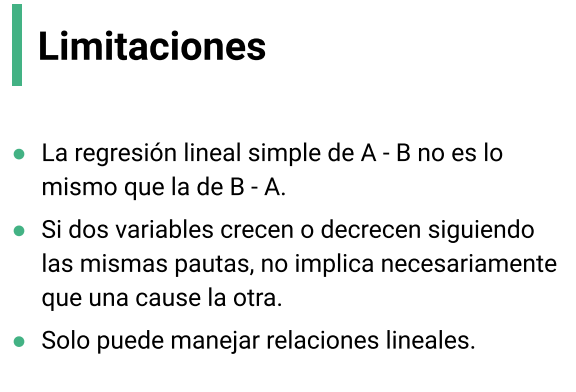

Si yo conozco una variable y esta es la variable independiente y tengo mi variable objetivo o target, entonces tengo que pensar quien es ella (A o B), es decir; si le doy la vuelta el significado será totalmente diferente. Habrá casos especiales donde será simétrico, pero por lo general no es así.

Así que dependerá de nosotros como será el análisis. Por lo tanto no es lo mismo A - B y B - A.

Como vimos anteriormente con el coeficiente de correlación lineal; podemos ver que tenemos otros datos que siguen otro tipo de función (parabola o función cuadrática, función cubica), podemos obtener valores cercanos pero eso no nos indica que sea el comportamiento real.

La regresión lineal nos va a explicar un fenómeno, asumiendo que nuestros datos siguen un determinado comportamiento. Por eso siempre visualicemos los datos.

In [1]:
# Importando librerías 
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de las gráficas

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Datos Preprocesados

In [3]:
preprocessed_penguins_df = pd.read_csv('dataset/penguins.csv').dropna()

In [4]:
preprocessed_penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


### La regresión no es simétrica

In [17]:
# Definir variables
x = preprocessed_penguins_df.bill_length_mm
y = preprocessed_penguins_df.bill_depth_mm

#Obteniendo modelos de Regresión
res_x_y = scipy.stats.linregress(x=x,y=y)
res_y_x = scipy.stats.linregress(x=y,y=x)

#Imprimir resultados
print(f'Regresión lineal X Y:\n{res_x_y}\n')
print(f'Regresión lineal Y X:\n{res_y_x}')

Regresión lineal X Y:
LinregressResult(slope=-0.08232675339862278, intercept=20.78664866843383, rvalue=-0.22862563591302903, pvalue=2.5282897209443286e-05, stderr=0.019268346735778867, intercept_stderr=0.8541730787409806)

Regresión lineal Y X:
LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302903, pvalue=2.5282897209443286e-05, stderr=0.14859778216623307, intercept_stderr=2.567341513538255)


#### X - Y
Aquí la interpretación, en el primer caso cuando:
- x: longitud de pico.
- y: profundidad de pico.

Decimos que por cada mm de longitud de pico tendríamos -0.08 mm de profundidad de pico. Pero si queremos invertir la comparación, entonces también cambia la interpretación.
#### Y - X
Aquí la interpretación, en el segundo caso cuando:
- x: profundidad de pico.
- y: longitud de pico.

Decimos que por cada mm de profundidad de pico tendríamos -0.63 mm de longitud de pico. Pero si queremos invertir la comparación, entonces también cambia la interpretación.

-----------------

Entonces lo principal que va cambiar es la pendiente o slope y es que nos explica como va a cambiar una variable respecto a la otra.

#### Grafica X - Y

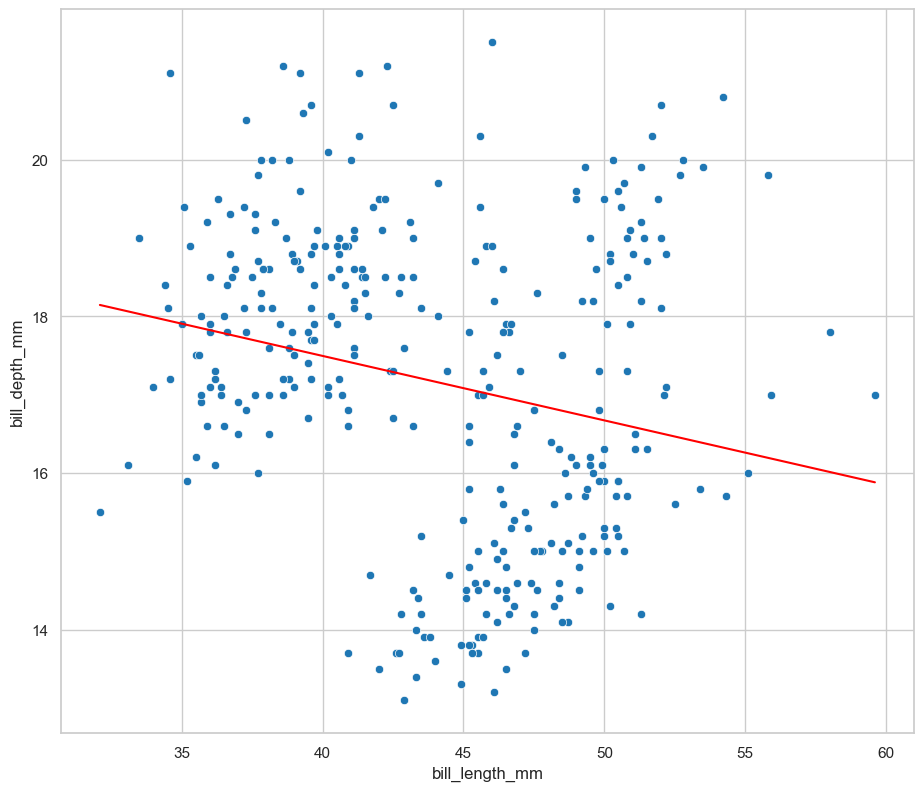

In [10]:
sns.scatterplot(
    x=x,
    y=y
)

x_lxy = np.array([x.min(),x.max()])
y_lxy = res_x_y.intercept + res_x_y.slope*x_lxy

plt.plot(x_lxy,y_lxy,color='red')

#### Grafica Y X

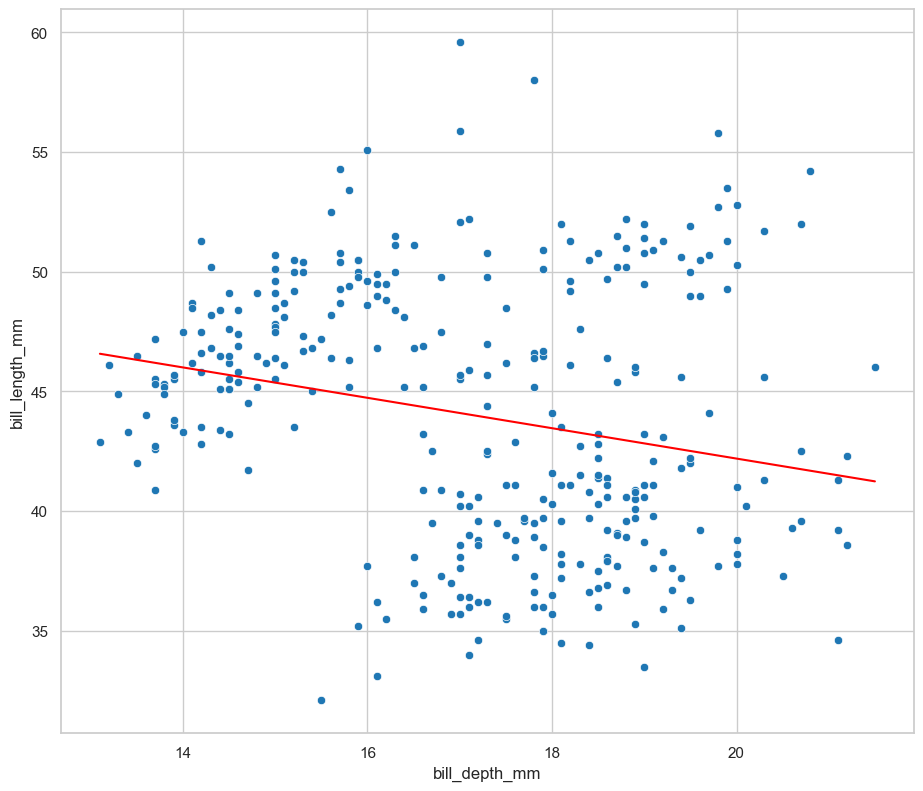

In [14]:
sns.scatterplot(
    x=y,
    y=x
)

x_lyx = np.array([y.min(),y.max()])
y_lyx = res_y_x.intercept + res_y_x.slope*x_lyx

plt.plot(x_lyx,y_lyx,color='red')

A pesar de que parecen iguales, no lo son. Nosotros podemos graficar la relación de las regresiones lineales. 

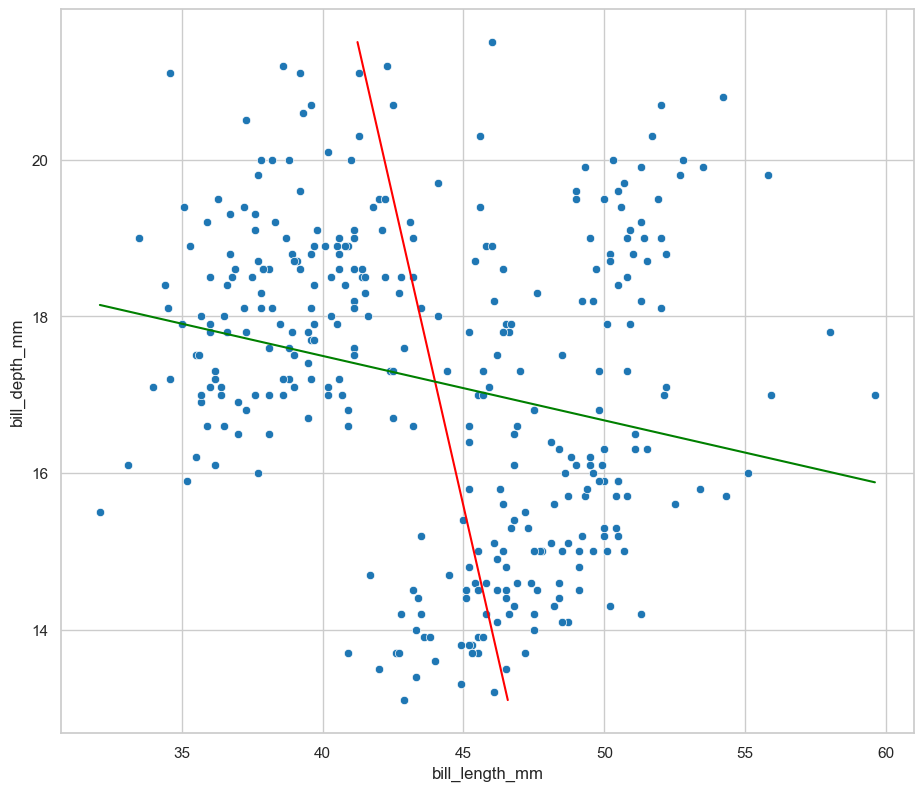

In [21]:
sns.scatterplot(
    x=x,
    y=y
)

x_lyx = np.array([y.min(),y.max()])
y_lyx = res_y_x.intercept + res_y_x.slope*x_lyx

plt.plot(y_lyx,x_lyx,color='red')
plt.plot(x_lxy,y_lxy,color='green')

Graficamos las 2 funciones, pero tuvimos que transponer una, para que quedaran se pudieran graficar e interceptar.

Pero como vimos en los modelos con la pendiente, es que existen relaciones negativas, y como se puede observar existe una pendiente diferente y eso sse ve reflejado en el análisis.

Entonces depende de que variable tomes o que jerarquía de análisis tomes, es decir si analizas x vs Y o si analizas Y vs X. Como se pudo observar no era lo mismo. En resumen esto va a depender de ti y de tu análisis, considera hacerlo de forma visual y agrega los parámetros de slope o pendiente.

### La regresión lineal no nos dice nada sobre causalidad.

Existen herramientas para separar las relaciones entre múltiples variables. Para ello tenemos la regresión lineal de multiples variables.

Vamos a llamar 
```js
smf.ols(
    formula = 'bill_length_mm - bill_depth_mm',
    data = preprocessed_penguins_df,
).fit()
.params
```

Que viene del paquete `statmodels`. Vamos a pasarle una fórmula especificando que variable depende de otra variable, podríamos decirle que queremos saber como se comporta **longitud de pico vs profundidad de pico** mediante `bill_length_mm ~ bill_depth_mm`.        
En este caso el símbolo $-$ nos va a decir *y ~ x*. Nos va a regresar un modelo y tenemos que realizar un paso extra [Ajustar el modelo] `.fit()`, y después mandamos a llamar los parámetros.

In [24]:
(
    smf.ols(
    formula = 'bill_length_mm ~ bill_depth_mm',
    data = preprocessed_penguins_df,
    )
    .fit()
    .params

)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

Y esto es lo que nos dice que por cada cambio en la unidad de profundidad de pico, nosotros esperamos -0.63 unidad de longitud de pico.


## EN RESUMEN:
### sms.ols() es un modelo que intenta predecir 'bill_length' a partir de 'bill_depth' con la siguiente sintaxis: 'bill_length_mm ~ bill_depth_mm'

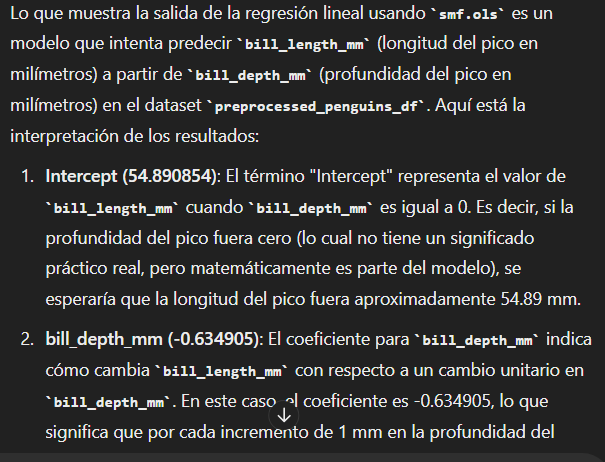
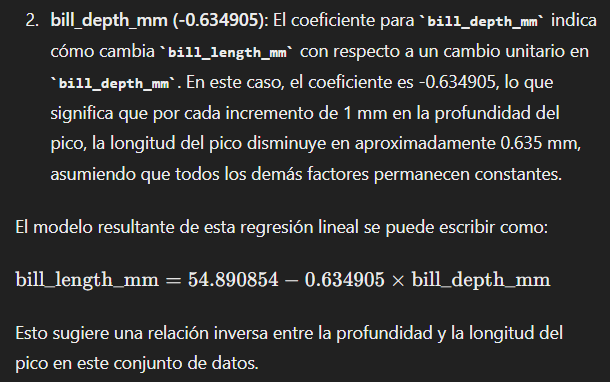

Podríamos hacerlo de manera inversa:

In [25]:
(
    smf.ols(
    formula = 'bill_depth_mm ~ bill_length_mm',
    data = preprocessed_penguins_df,
    )
    .fit()
    .params

)

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

Cómo se puede ver también cambia como lo habíamos mencionado anteriormente.

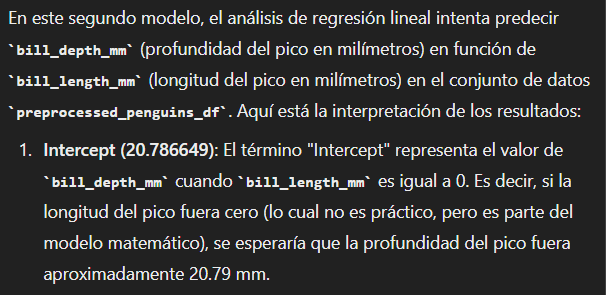
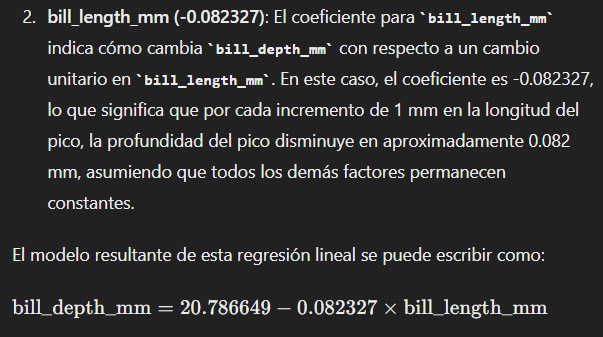
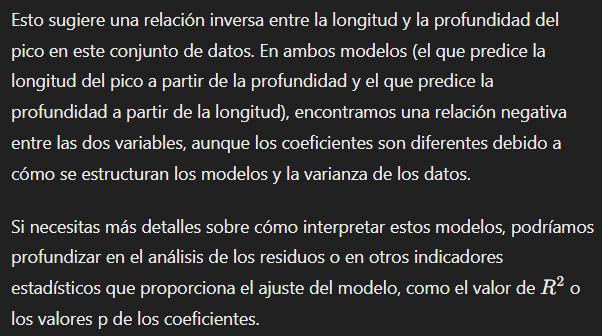